In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import seaborn as sns

In [2]:
## loading the data

df = pd.read_csv("~/Desktop/dqr_automate/diamonds.csv")
df.head(5)

,price,carat,clarity,cut,color,depth,table,x,y,z,date
0,580,0.32,VS1,Ideal,H,61.0,56.0,4.43,4.45,2.71,2012-02-26
1,650,0.34,SI1,Very Good,G,63.4,57.0,4.45,4.42,2.81,2012-02-26
2,630,0.30,VS2,Very Good,G,63.1,58.0,4.27,4.23,2.68,2012-02-26
3,706,0.35,VVS2,Ideal,H,59.2,56.0,4.60,4.65,2.74,2012-02-26
4,1080,0.40,VS2,Premium,F,62.6,58.0,4.72,4.68,2.94,2012-02-26


### Data quality report (DQR)

To help understand the quality of the tabular data available. Following a review of a DQR, one can determine steps to take on what outliers to remove, how to handle missing data (NaNs), change data types before starting modeling.

In [3]:
resp = "price" # output or response variable
descriptors = [] # variables that help identify rows/records
size = 100
nint = 20 # threshold lower than which variable would be treated as categorical
nchar = 25 #threshold of string length for a level name; lower which graph would be tightly laid out 

def dqr(resp, descriptors, df, size = 100, nint = 20, nchar = 25):

    mpl.rcParams["figure.dpi"] = size

    print("The data set contains ", len(df), " records/rows.")
    print(len(df.columns), " columns are available")

    temp = []
    for i in df.index:    
        temp.append(1 if np.sum(df.iloc[i, :].isna()) > 0 else 0)

    print("The data set contains ", np.sum(temp), " rows/records that have NaNs")

    if resp:
        print("Response variable is ", resp)
        print("Number of explanatory variables to consider is ", len(df.columns) - 1)
        response = df.pop(resp)
        df = pd.concat([response, df], axis = 1)
    else:
        print("No response variable.")
        print("Number of explanatory variables to consider is ", len(df.columns))

    for i in range(len(df.columns)):    
        print("\n+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-\n")

        print("\nColumn ", df.columns[i], "\n")
        # if variable is a descriptor/index variable for records/rows
        if df.columns[i] in descriptors:
            print("Number of NaNs: ", np.sum(df[df.columns[i]].isna()))
            print("Datatype (as given): ", df[df.columns[i]].dtype)
        else:
            print("Number of NaNs: ", np.sum(df[df.columns[i]].isna())) 
            print("Datatype (as given): ", df[df.columns[i]].dtype)

            if pd.api.types.is_object_dtype(df[df.columns[i]].infer_objects().dtype) and df[df.columns[i]][1:].apply(len).mean() < nchar:
                print("Datatype (recommended): CategoricalDtype()")
                test = df[df.columns[i]].astype('category')

            elif pd.api.types.is_numeric_dtype(df[df.columns[i]]) and df[df.columns[i]].nunique() < nint:
                print("Datatype (recommended): CategoricalDtype()")
                test = df[df.columns[i]].astype('category')

            else:
                print("Datatype (recommended): ", df[df.columns[i]].infer_objects().dtype)
                test = df[df.columns[i]].convert_dtypes()

            if pd.api.types.is_numeric_dtype(test):
                print("\nDescriptive Statistics:")
                print(test.describe())
                fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 2))
                plt.subplots_adjust(wspace=0.25, hspace=0.3)
                sns.histplot(x = test, ax=axes[0])
                sns.scatterplot(data = df, x = test, y = response, ax=axes[1])
                plt.show()

            else:
                print("\nCount/frequency of levels:")
                print(test.value_counts())

                if test.nunique() > nint:

                    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(12, 5))
                    plt.subplots_adjust(wspace=0.25, hspace=0.3)
                    from matplotlib.pyplot import MultipleLocator
                    plot = test.value_counts().sort_values().plot(kind = 'barh', x = response, ax=axes[0])
                    plot.set(xlabel = "Frequency")
                    plot.set(ylabel = df.columns[i])
                    y_major_locator = MultipleLocator(5)
                    plot.yaxis.set_major_locator(y_major_locator)
                    plt.tight_layout()

                    plot = sns.barplot(data = df, y = test, x = response, color = 'orange', ci = None, ax=axes[1])
                    plot.set(xlabel="Mean " + resp)
                    plot.set(ylabel = df.columns[i])
                    y_major_locator = MultipleLocator(5)
                    plot.yaxis.set_major_locator(y_major_locator)
                    plt.tight_layout()
                    plt.show()

                else:
                    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 2))
                    plt.subplots_adjust(wspace=0.25, hspace=0.3)
                    plot = test.value_counts().sort_values().plot(kind = 'barh', x = response, ax=axes[0])
                    plot.set(xlabel = "Frequency")
                    plot.set(ylabel = df.columns[i])

                    plot = sns.barplot(data = df, y = test, x = response, color = 'orange', ci = None, ax=axes[1])
                    plot.set(xlabel="Mean " + resp)
                    plot.set(ylabel = df.columns[i])
                    plt.show()

The data set contains  3000  records/rows.
11  columns are available
The data set contains  0  rows/records that have NaNs
Response variable is  price
Number of explanatory variables to consider is  10

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


Column  price 

Number of NaNs:  0
Datatype (as given):  int64
Datatype (recommended):  int64

Descriptive Statistics:
count     3000.0000
mean      3907.1860
std       3956.9154
min        338.0000
25%        938.0000
50%       2407.0000
75%       5274.0000
max      18791.0000
Name: price, dtype: float64


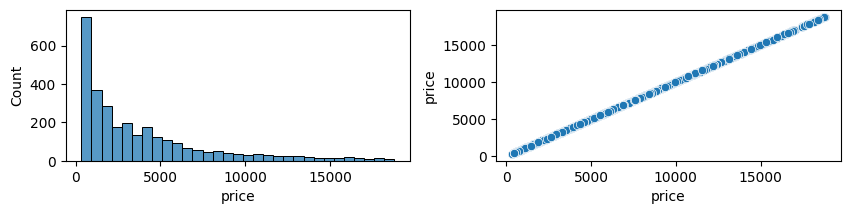


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


Column  carat 

Number of NaNs:  0
Datatype (as given):  float64
Datatype (recommended):  float64

Descriptive Statistics:
count    3000.000000
mean        0.794283
std         0.473826
min         0.200000
25%         0.390000
50%         0.700000
75%         1.040000
max         3.000000
Name: carat, dtype: float64


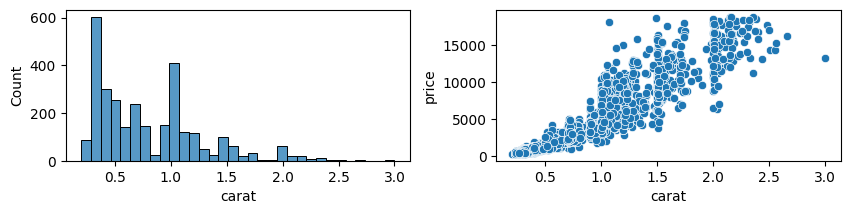


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


Column  clarity 

Number of NaNs:  0
Datatype (as given):  object
Datatype (recommended): CategoricalDtype()

Count/frequency of levels:
SI1     721
VS2     661
SI2     529
VS1     442
VVS2    284
VVS1    224
IF       99
I1       40
Name: clarity, dtype: int64


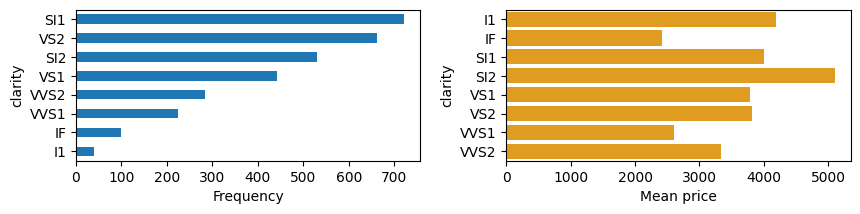


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


Column  cut 

Number of NaNs:  0
Datatype (as given):  object
Datatype (recommended): CategoricalDtype()

Count/frequency of levels:
Ideal        1176
Premium       771
Very Good     677
Good          275
Fair          101
Name: cut, dtype: int64


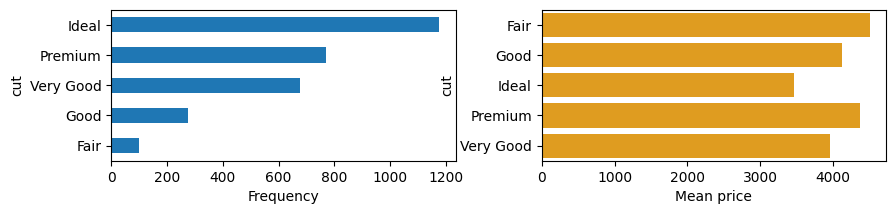


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


Column  color 

Number of NaNs:  0
Datatype (as given):  object
Datatype (recommended): CategoricalDtype()

Count/frequency of levels:
G    597
F    565
E    554
H    454
D    382
I    284
J    164
Name: color, dtype: int64


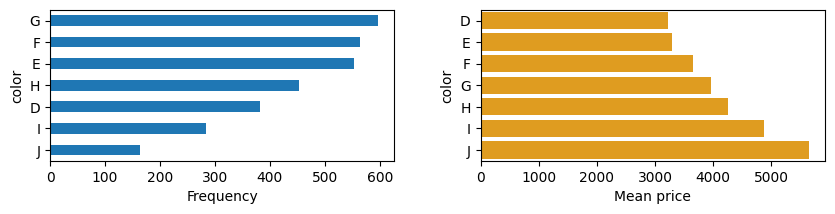


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


Column  depth 

Number of NaNs:  0
Datatype (as given):  float64
Datatype (recommended):  float64

Descriptive Statistics:
count    3000.000000
mean       61.752667
std         1.446028
min        54.200000
25%        61.100000
50%        61.900000
75%        62.500000
max        70.800000
Name: depth, dtype: float64


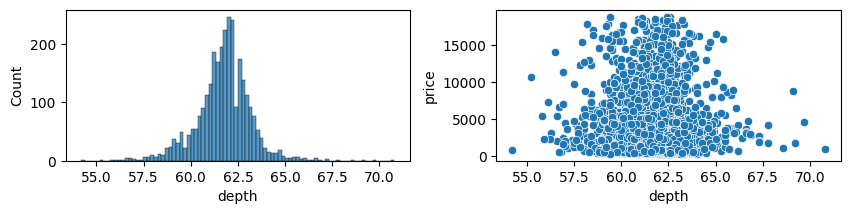


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


Column  table 

Number of NaNs:  0
Datatype (as given):  float64
Datatype (recommended):  float64

Descriptive Statistics:
count    3000.000000
mean       57.465333
std         2.241102
min        50.000000
25%        56.000000
50%        57.000000
75%        59.000000
max        69.000000
Name: table, dtype: float64


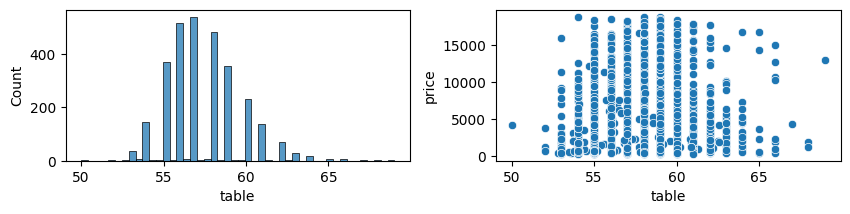


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


Column  x 

Number of NaNs:  0
Datatype (as given):  float64
Datatype (recommended):  float64

Descriptive Statistics:
count    3000.000000
mean        5.721823
std         1.124055
min         3.730000
25%         4.700000
50%         5.710000
75%         6.540000
max         9.420000
Name: x, dtype: float64


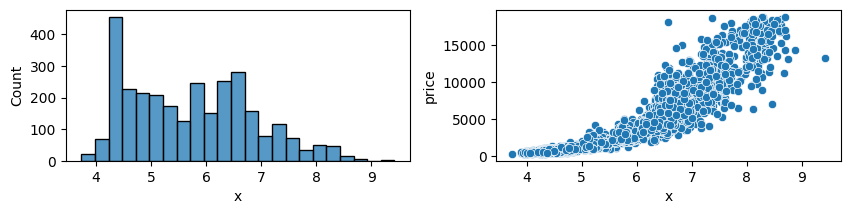


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


Column  y 

Number of NaNs:  0
Datatype (as given):  float64
Datatype (recommended):  float64

Descriptive Statistics:
count    3000.000000
mean        5.723300
std         1.114313
min         3.710000
25%         4.710000
50%         5.720000
75%         6.530000
max         9.260000
Name: y, dtype: float64


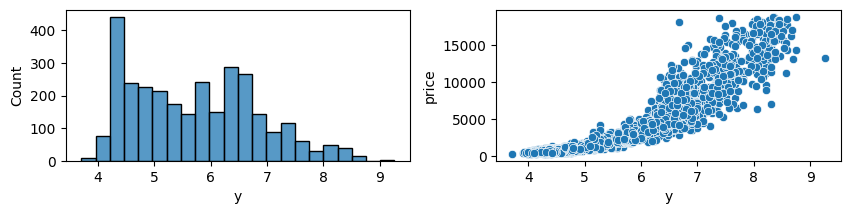


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


Column  z 

Number of NaNs:  0
Datatype (as given):  float64
Datatype (recommended):  float64

Descriptive Statistics:
count    3000.000000
mean        3.533447
std         0.693858
min         2.330000
25%         2.900000
50%         3.520000
75%         4.030000
max         5.580000
Name: z, dtype: float64


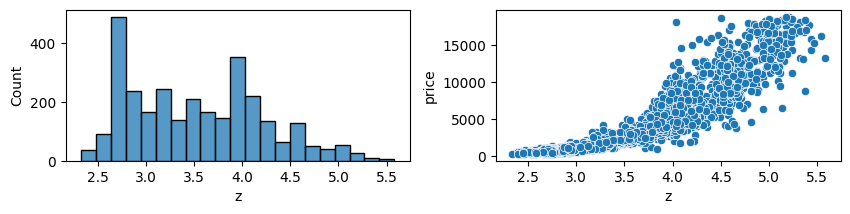


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


Column  date 

Number of NaNs:  0
Datatype (as given):  object
Datatype (recommended): CategoricalDtype()

Count/frequency of levels:
2012-03-19    119
2012-10-26    119
2014-06-30    116
2012-10-08    116
2012-02-26    114
2015-04-30    109
2015-02-23    109
2014-10-25    106
2015-08-29    106
2014-02-25    106
2012-07-02    104
2012-08-11    104
2014-09-14    103
2015-02-20    102
2015-06-02    101
2013-05-21     99
2014-03-06     94
2012-03-11     94
2014-12-13     94
2013-04-10     93
2014-04-11     92
2015-11-16     92
2015-12-01     91
2014-07-04     91
2012-06-21     91
2013-06-23     89
2014-07-16     88
2014-09-09     87
2015-02-27     87
2012-04-06     84
Name: date, dtype: int64


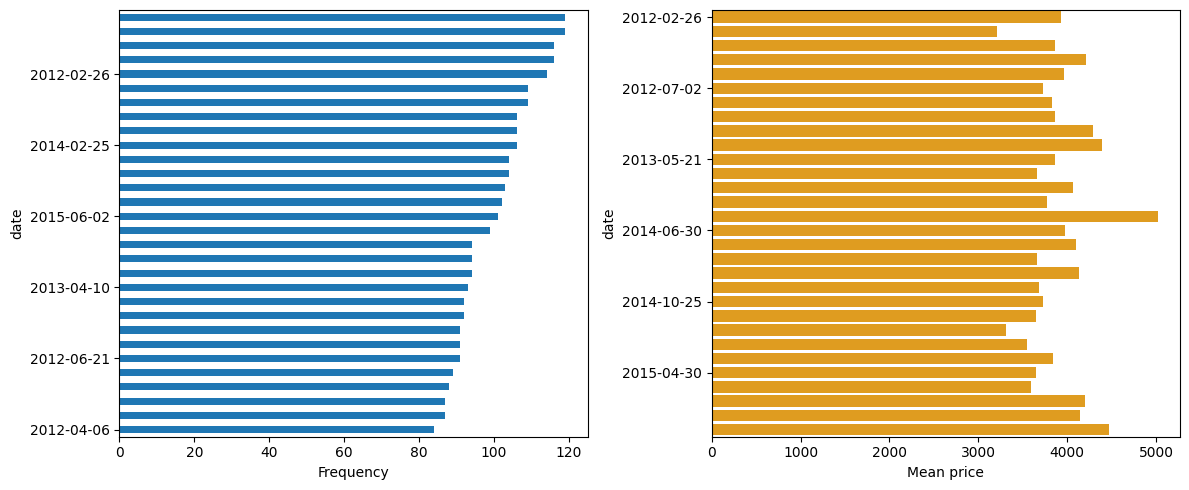

In [4]:
dqr(resp = resp, descriptors = descriptors, df = df, size = 100, nint = 20, nchar = 25)